In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

In [2]:

warnings.filterwarnings('ignore')
plt.style.use("seaborn") # plot style selected


In [3]:
#Load Datasets

dfx = pd.read_csv('datasets/xdata.csv', header = None)
dfy = pd.read_csv('datasets/ydata.csv', header = None)

In [4]:
dfx.head()

,0,1,2
0,0,3.482106,2.420392
1,1,3.516279,3.719750
2,2,4.606496,3.414379
3,3,4.677011,3.047244
4,4,4.157725,3.138677


In [5]:
dfy.head()

,0,1
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [6]:
#For plotting purpose we are required only values of DataFrame

X = dfx.values
Y = dfy.values

In [19]:
print(X.shape)
print(Y.shape)
print(np.unique(Y))

(400, 2)
(400,)
[0. 1.]


#### Understanding Dataset:

- X contains 2 columns that is there are going to be 2 features and 400 Data points and first column correspond to x axis and another one to y axis


- Y is column vector, which signifies to which class does the corresponding Data Value belongs to. Between there are 2 classes/Clusters in number


- When Y is even K should be odd and vice versa to avoid any draw condition

In [8]:
# X is comprise of an index column, which is of no use

X[:3, :]

array([[0.        , 3.48210557, 2.42039179],
       [1.        , 3.516279  , 3.71975047],
       [2.        , 4.60649561, 3.41437943]])

In [9]:
# Y too is comprise of an index column, which is of no use
Y[:3, :]

array([[0., 0.],
       [1., 0.],
       [2., 0.]])

In [10]:
# Slice them out

X = X[:, 1:]
Y = Y[:, 1:]

In [11]:
print(X.shape)
print(Y.shape)

(400, 2)
(400, 1)


In [12]:
# we want Y to be a 1 dim but here it is 2 dim
# Lets Reshape it

Y = Y.reshape((-1, ))

In [13]:
Y.shape

(400,)

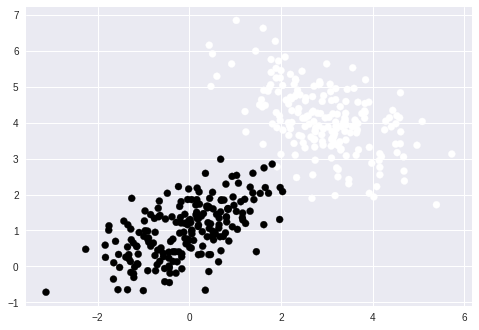

In [14]:
# C is the parameter controlling color of Data Points based on the value present in Y

plt.scatter(X[:, 0], X[:, 1], c = Y );

### Understanding KNN( )
$ \sqrt{(X - Query\_Point)^2}$

- Calculating X - Querry First
- Now add them column wise
- Now take root of it

In [23]:

def KNN(X, Y, Query_Point, K = 5):
    
    Distance = np.sqrt(np.sum(((X - Query_Point) **2), axis = 1)) 
    
    # Sorting the Distance and storing indexes till K Data Points
    Indexes = np.argsort(Distance)[:K]
    
    # Now finding out majority 
    Counting = np.unique(Y[Indexes], return_counts = True)
    
    print("Query_Point belongs to Group {}".format(int(Counting[0][np.argmax(Counting[1])])))
    

### Explanation : int(Counting[0][np.argmax(Counting[1])])

- First of all we will find which group is present their in majority through nm.argmax[Counting[1]]

- Now we have index of that group which is in majority so using slicing
we can print it through Counting[0][ ]

In [24]:
try : 
    # Accept Querry Point and convert it into a numpy array
    Query_Input = np.array(list(map(int, input("Enter the coordinate of a point ").split())))

    # Accept no of neighbours as well 
    K = int(input("How many odd number of nearest neighbours you want to consider "))
    assert K % 2 != 0
    KNN(X, Y, Query_Input, K)

except AssertionError : 
    print("You should have entered an odd integer for K ")

except :
    print("Try Again! ")

Enter the coordinate of a point 5 6
How many odd number of nearest neighbours you want to consider 7
Query_Point belongs to Group 0


### Justification : Scatter Plot

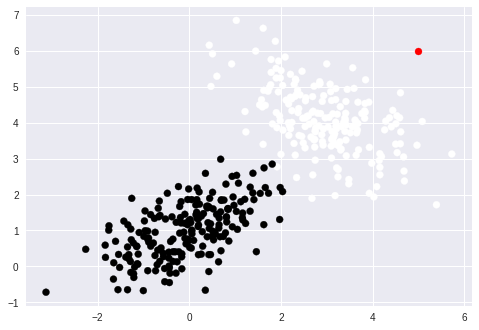

In [22]:

plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.scatter(Query_Input[0], Query_Input[1], color = 'red');
